In [69]:
import tensorflow as tf
from tensorflow import keras
import keras 
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keraspp import skeras
import numpy as np
from sklearn.model_selection import train_test_split
from keras import layers
from tensorflow.keras.utils import to_categorical

### 데이터 불러오기

In [86]:
mnist = tf.keras.datasets.mnist

(X_train,X_label),(y_train,y_label) = mnist.load_data()

### 데이터 확인

In [55]:
print(X_train.shape)
print(y_train.shape)
print(X_label.shape)
print(y_label.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


### 0~1 사이로 스케일 조정

In [87]:
X_train,X_test = X_train/255.0 , X_test/255.0

In [107]:
(x_train, x_label), (y_train, y_label) =mnist.load_data() 

x_train, y_test = x_train/255.0, y_test/255.0 # 유의점은 실수로 만들어주어야함 0~1사이로 만듬

x_train=x_train.reshape(60000,28,28,1)
y_train=y_train.reshape(10000,28,28,1)

x_train,val_train,x_label,val_label = train_test_split(x_train,x_label,test_size=0.2,random_state=124,shuffle=True)

x_label=to_categorical(x_label,10)
y_label=to_categorical(y_label,10)
val_label=to_categorical(val_label,10)

model = Sequential([
    keras.layers.Input(shape=(28,28,1)),
    keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'),
    keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'),
    keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'),
    #keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='relu'),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')
])

In [108]:
model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=['accuracy'])

In [109]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 conv2d_62 (Conv2D)          (None, 9, 9, 128)         73856     
                                                                 
 conv2d_63 (Conv2D)          (None, 7, 7, 256)         295168    
                                                                 
 flatten_15 (Flatten)        (None, 12544)             0         
                                                     

In [110]:
model.fit(x_train, x_label, epochs=5, batch_size=100,validation_data=(val_train,val_label))

Epoch 1/5
480/480 [==============================] - 76s 150ms/step - loss: 0.2429 - accuracy: 0.9261 - val_loss: 0.0880 - val_accuracy: 0.9736
Epoch 2/5
480/480 [==============================] - 72s 150ms/step - loss: 0.0671 - accuracy: 0.9807 - val_loss: 0.0569 - val_accuracy: 0.9832
Epoch 3/5
480/480 [==============================] - 71s 147ms/step - loss: 0.0427 - accuracy: 0.9874 - val_loss: 0.0494 - val_accuracy: 0.9850
Epoch 4/5
480/480 [==============================] - 70s 146ms/step - loss: 0.0308 - accuracy: 0.9907 - val_loss: 0.0452 - val_accuracy: 0.9861
Epoch 5/5
480/480 [==============================] - 70s 146ms/step - loss: 0.0248 - accuracy: 0.9919 - val_loss: 0.0451 - val_accuracy: 0.9866


In [159]:
model.evaluate(y_train,y_label)

313/313 [==============================] - 4s 11ms/step - loss: 6.7084 - accuracy: 0.9892


[6.708427906036377, 0.9891999959945679]

In [144]:
import matplotlib.pyplot as plt

In [161]:
result=model.predict(y_train)

313/313 [==============================] - 4s 11ms/step


In [162]:
a_result=np.argmax(result, axis=-1)

In [168]:
a_result[2]

1

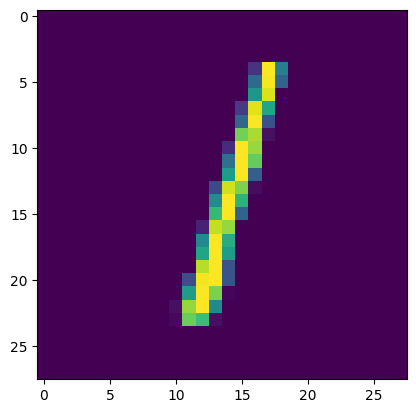

In [167]:
plt.imshow(y_train[2].reshape(28,28))

In [142]:
result=model.predict(y_train)

313/313 [==============================] - 3s 10ms/step


In [75]:
(x_train, x_label), (y_train, y_label) =mnist.load_data() 

x_train, y_test = x_train/255.0, y_test/255.0 # 유의점은 실수로 만들어주어야함 0~1사이로 만듬

x_train = x_train.reshape((60000, 28*28))
y_train = y_train.reshape((10000, 28*28))

x_train,val_train,x_label,val_label = train_test_split(x_train,x_label,test_size=0.2,random_state=124,shuffle=True)

x_label=to_categorical(x_label)
y_label=to_categorical(y_label)
val_label=to_categorical(val_label)

model =Sequential([
    layers.Dense(512, activation='relu'), # 512는 아웃풋이다. 
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics='acc')
model.fit(x_train, x_label, epochs=10, batch_size=128,validation_data=(val_train,val_label))


Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2851 - acc: 0.9184 - val_loss: 0.1553 - val_acc: 0.9539
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1182 - acc: 0.9648 - val_loss: 0.1036 - val_acc: 0.9678
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0781 - acc: 0.9772 - val_loss: 0.0953 - val_acc: 0.9718
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0555 - acc: 0.9830 - val_loss: 0.0862 - val_acc: 0.9744
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0411 - acc: 0.9880 - val_loss: 0.0782 - val_acc: 0.9777
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0323 - acc: 0.9902 - val_loss: 0.0755 - val_acc: 0.9792
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0247 - acc: 0.9928 - val_loss: 0.0758 - val_acc: 0.9780
Epoch 8/10
375/375 [==============================] - 3s 7ms/step - loss: 0.

In [76]:
model.evaluate(y_train,y_label)

313/313 [==============================] - 1s 2ms/step - loss: 16.9849 - acc: 0.9793


[16.984865188598633, 0.9793000221252441]